In [105]:
import plotly 
plotly.tools.set_credentials_file(username='ConnorTPhoenix', api_key='BAoqUaFQOvwXlqP9HNyD')

In [106]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cluster, datasets, preprocessing, metrics
import spotipy
from matplotlib import pyplot as plt
%matplotlib inline 

In [3]:
audio_feats = pd.read_csv('../DSI---Capstone-Project/audio_feats.csv')
track_lookup = pd.read_csv('../DSI---Capstone-Project/track_lookup.csv')

In [4]:
X = audio_feats.drop('popularity', axis=1)
y = audio_feats['popularity']
X.shape

(24323, 28)

## 

In [5]:
knn = KNeighborsClassifier()
knn.fit(X, np.random.randint(2, size=24323))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [6]:
Artist_Track = 'Michael Jackson: Thriller'
NoSongs = 15
Neighbors = knn.kneighbors(X.iloc[track_lookup[track_lookup['Artist_Track'] == Artist_Track].index.values[0],:], n_neighbors=NoSongs, return_distance=False)

for n in Neighbors:
    print track_lookup['Artist_Track'].iloc[n]

2081                      Michael Jackson: Thriller
9889                   Talking Heads: A Clean Break
3399                     The Rapture: Don Gon Do It
20530        Armand Van Helden: A Track Called Jack
11402                         Wham!: Club Tropicana
2203     Creedence Clearwater Revisited: Proud Mary
5623             Saint Etienne: Nothing Can Stop Us
14595                         Texas: Black Eyed Boy
22848                     Milk & Sugar: Stay Around
23101                                 Grey: Chanson
12948                 Elio E Le Storie Tese: Cateto
17971                   Oingo Boingo: Weird Science
850                     Angels & Airwaves: The Gift
9280                 Just Jack: Starz In Their Eyes
11280                        !!!: Pardon My Freedom
Name: Artist_Track, dtype: object


/Users/connorphoenix/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [7]:
X.iloc[:,0:11]

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,duration_ms,loudness,valence,mode
0,0.635909,-0.535033,-0.152610,-0.401025,0.255999,1.962191,1.612138,2.554877,-0.464801,-0.728601,-1.378561
1,1.064187,-0.862847,0.092648,0.204026,-0.754515,2.051700,1.692874,0.619663,-0.277583,1.772723,0.725394
2,0.929358,-0.569062,-0.082648,-0.152799,-0.384501,-0.636360,0.049329,0.200448,0.721719,-1.521540,-1.378561
3,0.842117,0.270324,-0.675983,0.789685,-0.721810,-0.062586,1.000855,-0.768328,1.046817,0.850975,0.725394
4,-0.922546,-0.616136,1.920630,0.041128,0.687290,2.107258,0.245401,1.922216,-2.233677,-1.486876,-1.378561
5,0.739013,0.882849,0.359176,-0.448860,-0.723676,1.885027,0.770182,0.501689,0.685377,1.402448,-1.378561
6,1.163325,3.321605,-0.052747,-0.168313,-0.754189,-0.635650,0.130065,0.316700,0.844401,0.256172,0.725394
7,-0.867028,-0.603091,-0.869049,-0.574266,1.459753,-0.634385,0.124298,0.171724,0.171079,-0.929494,-1.378561
8,-0.466510,-0.757924,-0.797592,-0.582023,0.999494,-0.620233,0.210800,0.023810,0.165572,-1.240683,-1.378561
9,-0.771856,0.984936,-0.456345,-0.561338,1.443660,2.354182,0.401105,-0.597085,-0.386830,-0.894042,0.725394


## Create Track K-Means Clusters (K=10)

In [8]:
kmeans = cluster.KMeans(n_clusters=10)
kmeans.fit(X.iloc[:,0:11])
labels = kmeans.labels_

In [9]:
X['labels'] = labels

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

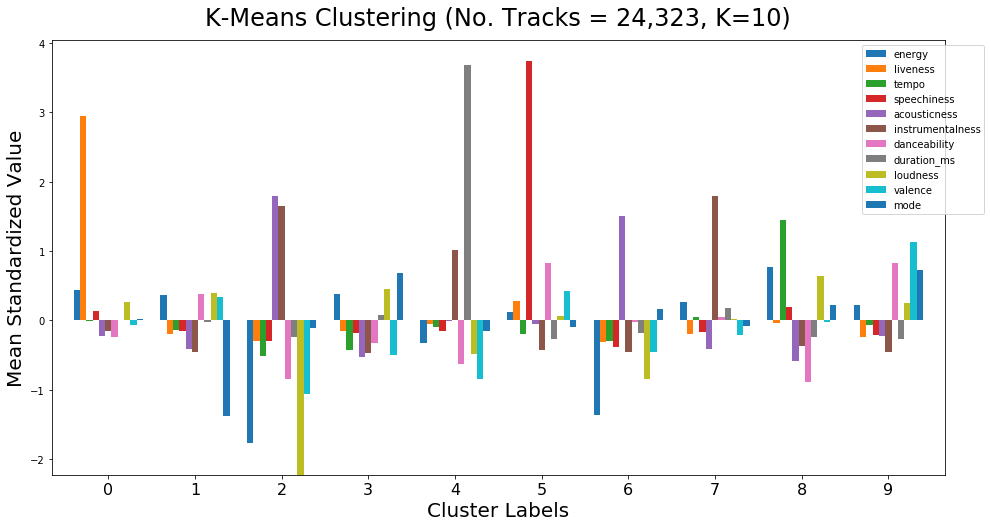

In [10]:
X.iloc[:,[-1,0,1,2,3,4,5,6,7,8,9,10]].groupby('labels').mean().plot(kind='bar', figsize=(16,8), width=.8)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel('Cluster Labels', fontsize=20)
plt.ylabel('Mean Standardized Value', fontsize=20)
plt.title('K-Means Clustering (No. Tracks = 24,323, K=10)', fontsize=24, y=1.02)
plt.xticks(rotation=0, fontsize=16)

In [11]:
X.iloc[:,23:28]

,t_1.0,t_3.0,t_3.90262357102,t_4.0,t_5.0
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0


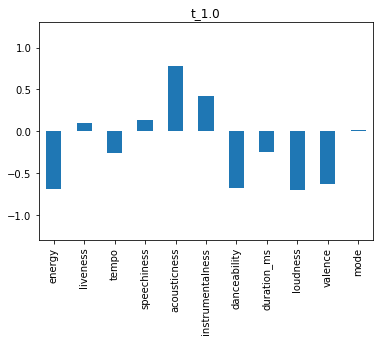

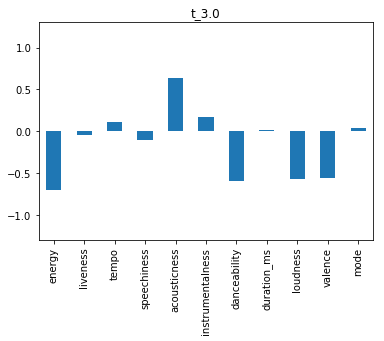

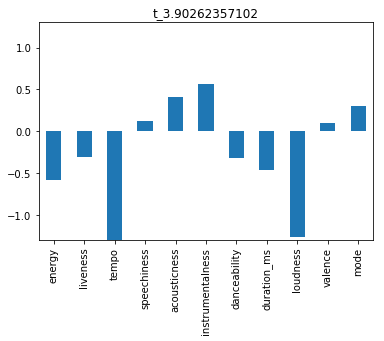

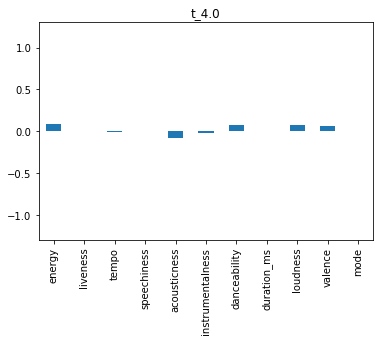

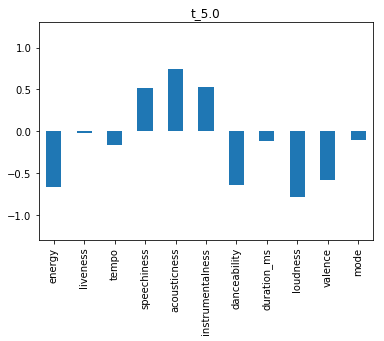

In [12]:
for i in X.iloc[:,23:28].columns:
    X[X[i]==1].groupby(i)[X.iloc[:,0:11].columns].mean().T.plot(kind='bar', legend=None)
    plt.title(i)
    plt.ylim(-1.3,1.3)
    plt.show

<function matplotlib.pyplot.show>

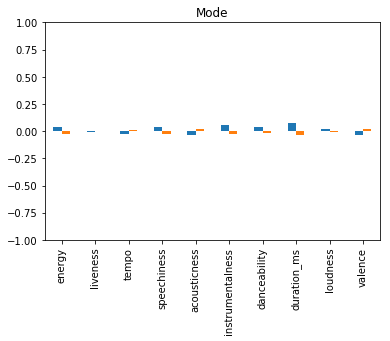

In [13]:
X.groupby('mode')[X.iloc[:,0:10].columns].mean().T.plot(kind='bar', legend=None)
plt.title('Mode')
plt.ylim(-1,1)
plt.show

In [14]:
# for c in X.iloc[:,23:28].columns:
#     X.groupby(c)[['acousticness','valence']].mean().T.plot(kind='bar', figsize=(20,10), width=.8, color='g')
#     plt.title(c, fontsize=24)
#     plt.xlabel('Cluster Label', fontsize=20)
#     plt.xticks(rotation=0, fontsize=16)
#     plt.show()

## Principal Component Analysis

In [15]:
pca = PCA().fit(X.iloc[:,0:11].corr())

In [16]:
pca.explained_variance_ratio_

array([  4.62671720e-01,   1.72721997e-01,   9.08617547e-02,
         8.05484562e-02,   6.25051000e-02,   4.69612017e-02,
         4.51212730e-02,   2.51307760e-02,   1.17313472e-02,
         1.74637432e-03,   1.99112248e-36])

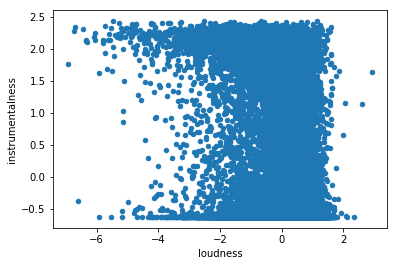

In [17]:
X.plot(kind='scatter',x='loudness', y='instrumentalness')

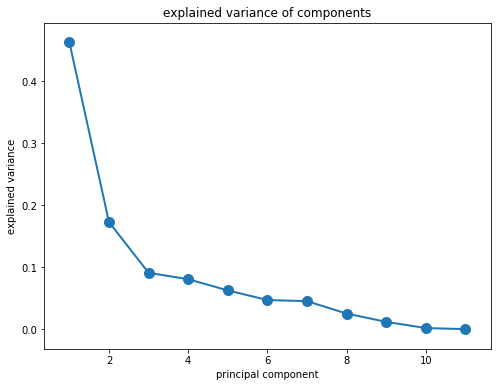

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,12), pca.explained_variance_ratio_, lw=2)
ax.scatter(range(1, 12), pca.explained_variance_ratio_, s=100)
ax.set_title('explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance');

In [19]:
print 'Eigen Vectors:'
pd.DataFrame(pca.components_, index=X.iloc[:,0:11].columns)

Eigen Vectors:


,0,1,2,3,4,5,6,7,8,9,10
energy,-0.536171,-0.076428,-0.162775,-0.098833,0.501233,0.254998,-0.072380,0.094671,-0.522284,-0.253941,0.051850
liveness,-0.185792,-0.190675,-0.187509,0.023196,0.185892,-0.300348,0.602123,-0.336003,-0.093961,0.531470,0.043843
tempo,0.051350,-0.514269,-0.071675,-0.429810,-0.209280,0.316786,0.283884,0.506224,0.059339,0.105986,-0.217389
speechiness,-0.027650,-0.331097,0.432078,-0.449273,0.027527,-0.071956,-0.211807,-0.224004,0.046354,0.047959,0.629006
acousticness,-0.041088,-0.247662,0.670930,0.188787,0.107181,0.173301,-0.051884,-0.271597,-0.123207,0.096827,-0.555567
instrumentalness,-0.039050,-0.556577,0.034210,0.655183,-0.037710,-0.254762,0.020761,0.283716,0.008138,-0.223714,0.246775
danceability,0.177720,-0.188872,-0.291998,0.245791,-0.188131,0.694098,0.023394,-0.472743,-0.016231,-0.007181,0.213433
duration_ms,0.095248,-0.366955,-0.366005,-0.184297,0.368938,-0.204014,-0.254686,-0.298649,0.436345,-0.261079,-0.313042
loudness,0.116602,-0.116008,-0.204047,0.106482,0.098858,0.000703,-0.618713,0.187455,-0.176680,0.678565,-0.024265
valence,0.701683,-0.086391,-0.043681,-0.127289,0.089774,-0.204513,0.096484,-0.062537,-0.615549,-0.197546,-0.032222


In [20]:
pca_df = pd.DataFrame(pca.transform(X.iloc[:,0:11]))
pca_df.shape

(24323, 11)

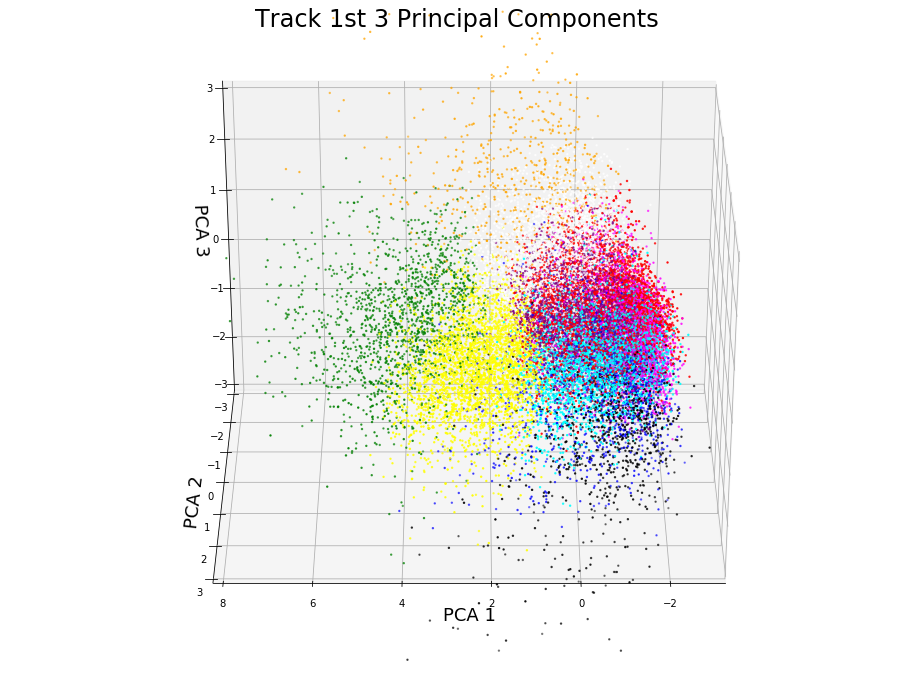

In [56]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
colors = {0:'blue', 1:'red', 2:'green', 3:'purple', 4:'orange', 5:'black',6:'yellow', 7:'white', 8:'magenta', 9:'cyan'}

fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection='3d')

x = pca_df[0]
y1 = pca_df[1]
z = pca_df[2]
s = ax.scatter(x, y1, z, s=2, depthshade=True, c=X['labels'].apply(lambda x: colors[x]))
# s.set_edgecolors = s.set_facecolors = lambda *args:None

ax.legend
ax.set_xlim3d(-3, 8)
ax.set_ylim3d(-3,3)
ax.set_zlim3d(-3,3)
plt.title('Track 1st 3 Principal Components', y=1.05, fontsize=24)
ax.set_xlabel('PCA 1', fontsize=18)
ax.set_ylabel('PCA 2', fontsize=18)
ax.set_zlabel('PCA 3', fontsize=18)
# ax.view_init(azim=90)
# for i, party in enumerate(votes['Class_abbr']):

#     ax.text(pca_df.iloc[i][0], pca_df.iloc[i][1], pca_df.iloc[i][2],party, withdash=True)
# ax.set(xlabel="pc1",ylabel="pc2",zlabel="pc3")
# ax.view_init(15, 130)
# plt.draw()


ax.view_init(azim=90)

In [127]:
pca_df['labels'] = X['labels']

In [155]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np
labels = [0,1,2,3,4,5,6,7,8,9]
traces = []
for l in labels:
    x, y, z = pca_df[pca_df['labels']==l].iloc[:,0:3].values.transpose()
    trace = go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='markers',
        marker=dict(
            size=3,
            line=dict(color='rgba(2, 100, 50, 0.14)', width=0.5), opacity=0))
    traces.append(trace)


data = traces
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ConnorTPhoenix/0 or inside your plot.ly account where it is named 'simple-3d-scatter'
